In [25]:
#1. Importing the necessary libraries to build a multiple linear regression model.
#Pandas: A library for data manipulation and analysis.
#NumPy: A library for numerical computing.
#Matplotlib: A library for data visualization.
#Scikit-learn: A library for machine learning.
#Importing the libraries using the following commands:

Making a Multiple Linear Regression Model to Predict Wind Turbine Energy Generation."


In [26]:
#Objective
#Create an energy model using a multiple linear regression function to predict the energy generation of a wind turbine based on data collected from a turbine that is operational and generating power in Turkey. The turbine is controlled, monitored, and collects data using the SCADA system. The data was collected throughout the year 2018, at 10-minute intervals.

#The data set was retrieve from Kaggle's repository.

#The wind turbine data set contains:

#Date/Time (for 10 minutes intervals)
#LV ActivePower (kW): The power generated by the turbine for that moment
#Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
#Theoretical_Power_Curve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
#Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

#Importing the librearies:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


2. Loading the data

In [28]:
data=pd.read_csv('C:/Users/HP/Desktop/Wind Turbine Project/T1.csv')

3. Exploring the data:

In [29]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [30]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


4. Preparing the data:

In [32]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [33]:
# Filtering out rows with negative or zero LV ActivePower values:
data = data[data['LV ActivePower (kW)'] > 0]
# Removing missing values:

data = data.dropna()

# Printing the first 5 rows of the cleaned dataset:

print(data.head())

# Printing the data description:

print(data.describe())

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  
       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         39692.000000      39692.000000                   39692.000000   
mean           1664.751281          8.769781                    1829.739672   
std            1264.303861          3.773594                

5. Exploring the data with visualizations

Plotting the relationship between the four vaiables Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve to explore the data.


5.1 Creating a pair plot of Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve to verify correlations

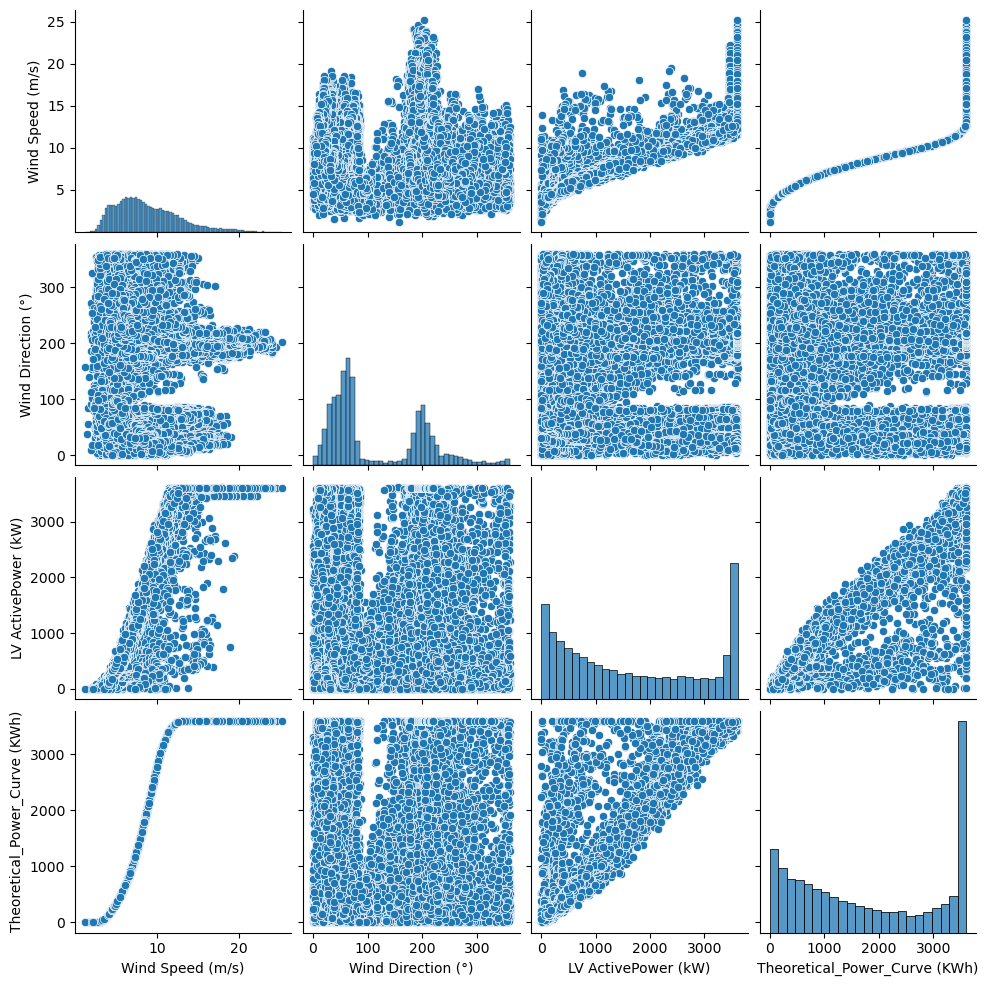

In [34]:
# Creating Pair plot of Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve

sns.pairplot(data=data, vars=["Wind Speed (m/s)", "Wind Direction (°)", "LV ActivePower (kW)", "Theoretical_Power_Curve (KWh)"])
plt.show() 

Observations: It is clear where the data has different correlations, the most evident is in the correlations between:
* "Wind Speed (m/s)" and "Theoretical_Power_Curve (KWh)"
* "Wind Speed (m/s)" and "LV ActivePower (kW)"

5.1 Creating histograms for Wind Speed, Wind Direction, LV ActivePower, and Theoretical_Power_Curve to review the distribution of each value

For "Wind Speed (m/s)"

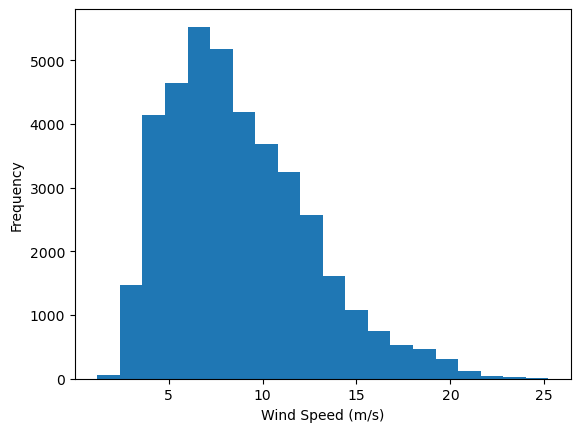

In [35]:
plt.hist(data["Wind Speed (m/s)"], bins=20)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

For "Wind Direction (°)"

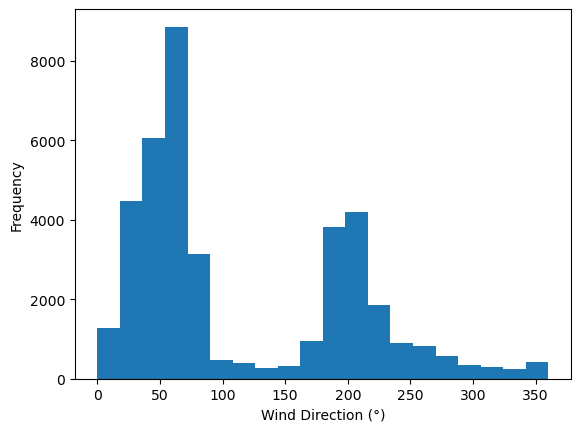

In [36]:
plt.hist(data["Wind Direction (°)"], bins=20)
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()

For "LV ActivePower (kW)"

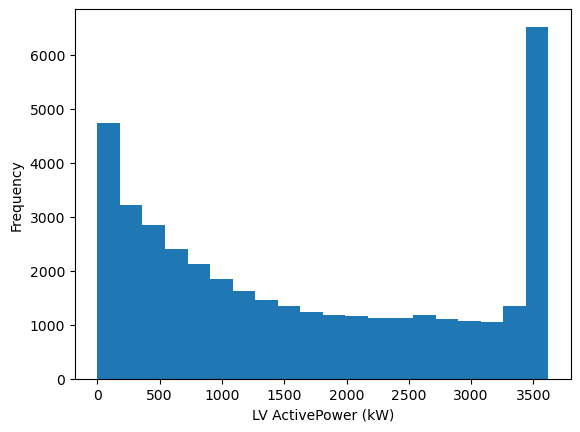

In [37]:
plt.hist(data["LV ActivePower (kW)"], bins=20)
plt.xlabel("LV ActivePower (kW)")
plt.ylabel("Frequency")
plt.show()

For "Theoretical_Power_Curve (KWh)"

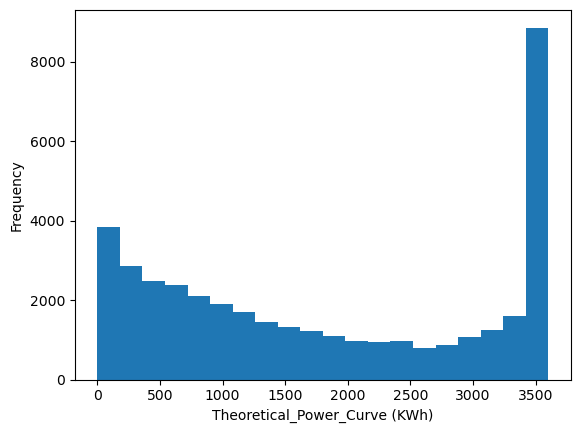

In [38]:
plt.hist(data["Theoretical_Power_Curve (KWh)"], bins=20)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("Frequency")
plt.show()

5.2 Creating a Box plot of LV ACtivePower by month to verify the ranges of the active power.

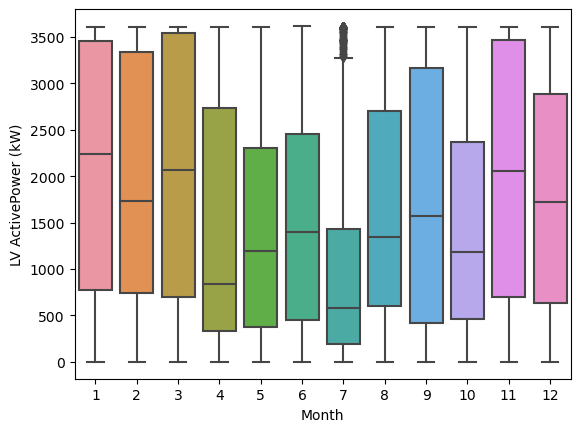

In [40]:
# Box plot of LV ActivePower by month
data["Month"] = pd.to_datetime(data["Date/Time"]).dt.month
sns.boxplot(x="Month", y="LV ActivePower (kW)", data=data)
plt.xlabel("Month")
plt.ylabel("LV ActivePower (kW)")
plt.show()

Observations: We can see that the widest rangest of active power are for the months of January, February, March,September, November, and December. This must align with the a higher wind speed compared to other months during the course of the year.

6. Splitting the data into training and test sets:

To evaluate the performance of the multiple regression model. First, to split the data into a training set and a test set is needed. For this purpose, the Scikit-learn's train_test_split function were used:

.The code is splitting the data into training and testing sets using the train_test_split() function from the sklearn.model_selection module. Here's what each step does:

In [41]:
# Importing the necessary libraries:

from sklearn.model_selection import train_test_split

# Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Here, the X variable to a subset of the original data is assigned , which includes 
# only the desired features to use for prediction: wind speed, wind direction, and 
# theoretical power curve. The y variable to the target variable is assigned, this 
# variable is the desired to predict, which is the LV ActivePower (kW).


# Splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# This line of code is using train_test_split() to split the data into training and testing sets.

# The X and y variables are the data that will be split.
# test_size=0.2 means that we want to use 20% of the data for testing and 80% for training.
# random_state=0 is an optional parameter that sets the random seed for reproducibility.
# The train_test_split() function returns four outputs: X_train, X_test, y_train, and y_test.

# X_train and y_train are the training sets for the features and target variable, respectively.
# X_test and y_test are the testing sets for the features and target variable, respectively."
# The training data can be used to build our model and the testing data to evaluate its performance.


7. Training the model:

Once the data has split into training and test sets, training multiple linear regression model is possible using Scikit-learn's LinearRegression class:

The purpose of this step is to teach the model to learn the relationship between the input variables (wind speed, wind direction, and theoretical power curve) and the target variable (LV ActivePower).

To train the model, first an instance of the LinearRegression class provided by the Scikit-learn library must be created. This class implements the ordinary least squares method to estimate the parameters of the multiple linear regression model.

Then, the fit method of the LinearRegression class is used to train the model. This method takes the training data as input, for example, the input variables (X_train) and the target variable (y_train). During the training process, the model adjusts its parameters to minimize the difference between its predicted output and the actual output (i.e., the target variable).

Once the model is trained, it can be used to make predictions on new, unseen data.

In [42]:
# Importing the necessary libraries:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    # Preparing the data:

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']
    
    # Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Building the model:

model = LinearRegression()
model.fit(X_train, y_train)

    # Evaluating the model, calculating metrics:
    
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    # Printing the coefficients and intercept:

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Coefficients: [50.847803    0.30246839  0.80591175]
Intercept: -291.0672298196066
Mean Squared Error: 72844.55159195741
Mean Absolute Error: 137.72002673118868
R-squared: 0.9547508782620041


7.1 Creating plots with trend lines and their equation for each coefficient

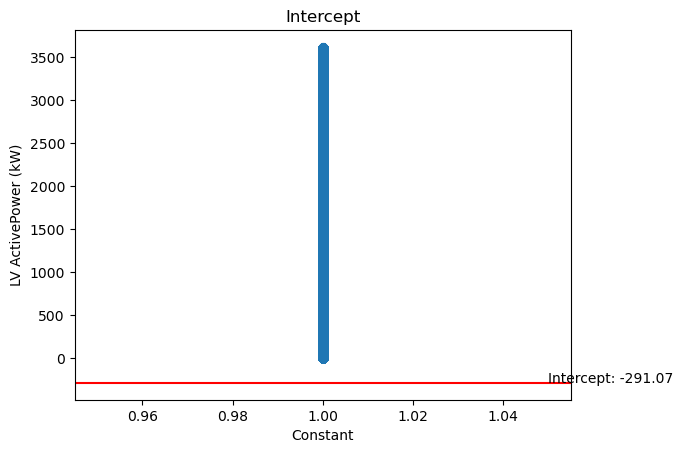

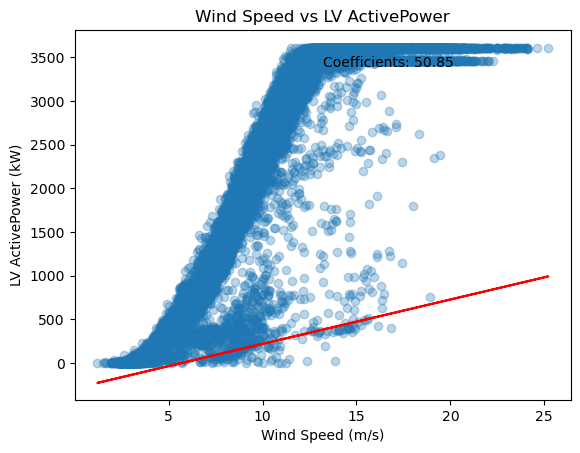

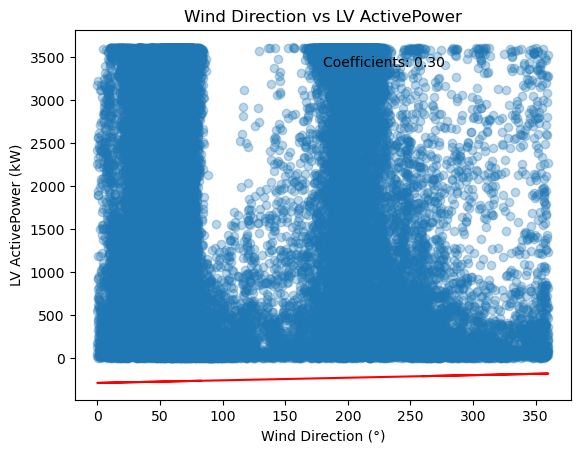

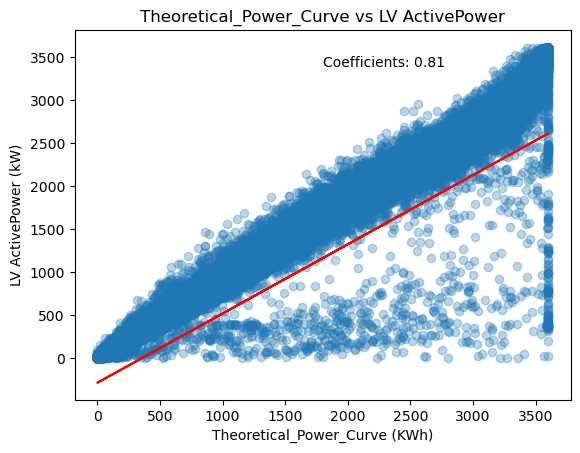

In [43]:
import matplotlib.pyplot as plt

# Plotting LV ActivePower vs constant value of 1.0:

plt.scatter([1.0] * len(data), data['LV ActivePower (kW)'], alpha=0.3)
plt.axhline(y=model.intercept_, color='red', linestyle='-')
plt.xlabel('Constant')
plt.ylabel('LV ActivePower (kW)')
plt.title('Intercept')
plt.text(1.05, model.intercept_, f"Intercept: {model.intercept_:.2f}")
plt.show()
# Plotting Wind Speed vs LV ActivePower:

plt.scatter(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], alpha=0.3)
plt.plot(data['Wind Speed (m/s)'], model.coef_[0] * data['Wind Speed (m/s)'] + model.intercept_, color='red')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Speed vs LV ActivePower')
plt.text(0.5, 0.9, 'Coefficients: {:.2f}'.format(model.coef_[0]), transform=plt.gca().transAxes)
plt.show()

# Plotting Wind Direction vs LV ActivePower:

plt.scatter(data['Wind Direction (°)'], data['LV ActivePower (kW)'], alpha=0.3)
plt.plot(data['Wind Direction (°)'], model.coef_[1] * data['Wind Direction (°)'] + model.intercept_, color='red')
plt.xlabel('Wind Direction (°)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Wind Direction vs LV ActivePower')
plt.text(0.5, 0.9, 'Coefficients: {:.2f}'.format(model.coef_[1]), transform=plt.gca().transAxes)
plt.show()

# Plotting Theoretical_Power_Curve vs LV ActivePower:

plt.scatter(data['Theoretical_Power_Curve (KWh)'], data['LV ActivePower (kW)'], alpha=0.3)
plt.plot(data['Theoretical_Power_Curve (KWh)'], model.coef_[2] * data['Theoretical_Power_Curve (KWh)'] + model.intercept_, color='red')
plt.xlabel('Theoretical_Power_Curve (KWh)')
plt.ylabel('LV ActivePower (kW)')
plt.title('Theoretical_Power_Curve vs LV ActivePower')
plt.text(0.5, 0.9, 'Coefficients: {:.2f}'.format(model.coef_[2]), transform=plt.gca().transAxes)
plt.show()

7.2 Creating a visualization for the equation of the energy model predicted

Creating a 3D scatter plot to show the relationship between the input variables (wind speed, wind direction, and theoretical power curve) and the target variable (LV ActivePower).

LV ActivePower (kW) = 50.847803 * Wind Speed (m/s) + 0.30246839 * Wind Direction (°) + 0.80591175 * Theoretical_Power_Curve (KWh) - 291.0672298195989
Based on the coefficients and intercept, an equation was created representing the energy model prediction.

The coefficients represent the slope of the line for each input variable. In other words, they indicate the amount of change in the output variable (LV ActivePower) for a unit change in the respective input variable, while holding all other variables constant.

The intercept represents the value of the output variable (LV ActivePower) when all input variables are zero.

So, the equation for the energy model prediction is:

    LV ActivePower (kW) = 50.847803 * Wind Speed (m/s) + 0.30246839 * Wind Direction (°) + 0.80591175 * Theoretical_Power_Curve (KWh) - 291.0672298195989
This equation can be used to predict the LV ActivePower for new data.



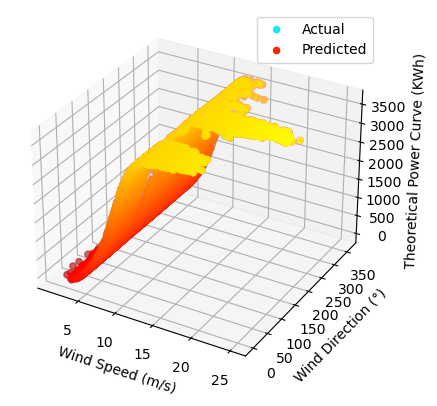

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Input variables:

wind_speed = data['Wind Speed (m/s)']
wind_direction = data['Wind Direction (°)']
power_curve = data['Theoretical_Power_Curve (KWh)']

# Target variable:

active_power = data['LV ActivePower (kW)']

# Prediction function:

def predict_energy_model(wind_speed, wind_direction, power_curve):
    return 50.847803 * wind_speed + 0.30246839 * wind_direction + 0.80591175 * power_curve - 291.0672298195989

# Generating data for the plot:

x = np.array(wind_speed)
y = np.array(wind_direction)
z = np.array(power_curve)
c = np.array(active_power)
c_pred = np.array(predict_energy_model(wind_speed, wind_direction, power_curve))

# Creating the plot:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=c, cmap='cool', label='Actual')
ax.scatter(x, y, z, c=c_pred, cmap='autumn', label='Predicted')
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Wind Direction (°)')
ax.set_zlabel('Theoretical Power Curve (KWh)')
ax.legend()
plt.show()

8. Evaluating the model

After training the model, an evaluation related to its performance on the test set is needed using various metrics such as mean squared error and R-squared.

To do this Scikit-learn's mean_squared_error and r2_score functions were imported and After building the model.

The mean squared error (MSE) and R-squared metrics from Scikit-learn's metrics module were imported.

The predict() method of the LinearRegression object was used to make predictions on the test set. Calculated the MSE and R-squared values and printed them:

In [45]:
# Importing the necessary libraries:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preparing the data: 

X = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
y = data['LV ActivePower (kW)']

# Splitting the data:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Building the model:

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model, calculating metrics:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics:

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 72844.55159195741
Mean Absolute Error: 137.72002673118868
R-squared: 0.9547508782620041


9. Visualizing the model


Visualizing the model's performance by comparing the actual output with the predicted output on the test set using a scatter plot.

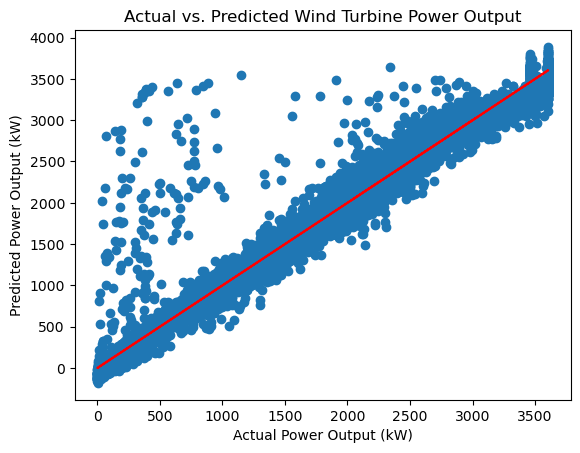

In [46]:
# Creating a scatter plot of the actual output (y_test) vs. the predicted output (y_pred) using matplotlib's scatter() function:

plt.scatter(y_test, y_pred)

# Adding a line representing perfect predictions (i.e., y_test = y_pred) using matplotlib's plot() function:

plt.plot(y_test, y_test, color='red')

# Adding labels for the x-axis, y-axis, and title using matplotlib's xlabel(), ylabel(), and title() functions:

plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs. Predicted Wind Turbine Power Output")

## Displaying the plot using matplotlib's show() function:

plt.show()

10. Conclusion

This notebook, specifies how to build a multiple linear regression model to predict the energy generation of a wind turbine. The project consisted in different steps. First, imported the necessary libraries, then loaded and cleaned the data, and prepared it for modeling.Then,splitted the data into training and test sets, built the model, and evaluated its performance on the test set using mean squared error and R-squared metrics.

Based on the R-squared value of 0.95, the model seems to fit the data well and can be used for predicting the energy generation of the wind turbine based on its wind speed, wind direction, and theoretical power curve.